<h1>Importation de bibliothèques</h1>

In [133]:
import pandas as pd 
import sklearn as sl
import matplotlib.pylab as plt
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

<h1>Collection des données</h1>

In [15]:
df = pd.read_csv("data.csv", delimiter = ";", encoding='latin-1',header= 0, index_col=0) 

<h1> Nettoyage de données  </h1>

In [16]:
# Taille de la matrice df 
df.shape

(38, 34)

In [17]:
df.drop(columns=["Latitude", "Longitude", "Géographie"],inplace=True)
df.head()


,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,...,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Précipitations de mai à aout,Précipitations sept-oct
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,...,6.0,10.0,11.0,13.0,95.0,14.71,14.5,2811.0,13.9,25.8
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,...,12.0,13.0,15.0,16.0,154.0,11.28,14.5,1899.0,29.0,30.8
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,...,12.0,13.0,15.0,16.0,160.0,12.02,14.9,1989.0,29.9,31.0
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,...,13.0,14.0,15.0,15.0,169.0,10.04,17.6,1897.0,35.8,35.5
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,...,14.0,15.0,16.0,17.0,177.0,13.58,12.3,1921.0,26.0,36.8


In [18]:
df.describe()

,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,...,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Précipitations de mai à aout,Précipitations sept-oct
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,65.500000,60.411765,56.235294,52.529412,59.441176,60.794118,45.882353,64.558824,71.441176,73.058824,...,11.058824,12.382353,13.588235,14.705882,143.735294,11.686176,15.773529,2066.705882,30.400000,35.594118
std,23.187314,17.472260,15.113828,13.918018,14.902087,19.487027,17.750399,24.017911,20.682581,25.254992,...,2.773699,2.462011,2.996135,3.060297,33.355122,1.800037,2.008363,401.788164,8.028548,5.310877
min,27.000000,27.000000,30.000000,35.000000,38.000000,23.000000,10.000000,15.000000,43.000000,43.000000,...,5.000000,8.000000,6.000000,9.000000,76.000000,9.490000,10.200000,1633.000000,13.900000,25.800000
25%,52.250000,49.250000,45.000000,44.250000,49.250000,52.000000,37.250000,54.750000,57.250000,54.250000,...,10.000000,11.000000,12.000000,13.250000,133.250000,10.462500,14.550000,1802.750000,26.125000,32.125000
50%,62.500000,55.000000,52.500000,48.000000,53.000000,57.500000,47.000000,64.500000,68.000000,68.500000,...,12.000000,13.000000,15.000000,16.000000,157.500000,11.155000,15.700000,1900.000000,30.750000,34.600000
75%,77.500000,68.750000,65.500000,57.750000,69.500000,71.000000,55.750000,75.250000,79.500000,83.250000,...,13.000000,14.000000,15.000000,16.750000,165.000000,13.167500,17.400000,2095.250000,36.025000,37.325000
max,130.000000,105.000000,98.000000,102.000000,100.000000,107.000000,80.000000,123.000000,155.000000,152.000000,...,16.000000,19.000000,20.000000,22.000000,201.000000,15.280000,18.600000,2917.000000,48.200000,51.300000


In [19]:
#Nombre d'observations
n = df.shape[0]
#Nombre de variables
p = df.shape[1]
df.head(5)


,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,...,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Précipitations de mai à aout,Précipitations sept-oct
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,...,6.0,10.0,11.0,13.0,95.0,14.71,14.5,2811.0,13.9,25.8
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,...,12.0,13.0,15.0,16.0,154.0,11.28,14.5,1899.0,29.0,30.8
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,...,12.0,13.0,15.0,16.0,160.0,12.02,14.9,1989.0,29.9,31.0
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,...,13.0,14.0,15.0,15.0,169.0,10.04,17.6,1897.0,35.8,35.5
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,...,14.0,15.0,16.0,17.0,177.0,13.58,12.3,1921.0,26.0,36.8


In [32]:
# Suppression des quatre dernières lignes parasites
df=df.dropna()
df.head()

,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,...,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Précipitations de mai à aout,Précipitations sept-oct
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,...,6.0,10.0,11.0,13.0,95.0,14.71,14.5,2811.0,13.9,25.8
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,...,12.0,13.0,15.0,16.0,154.0,11.28,14.5,1899.0,29.0,30.8
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,...,12.0,13.0,15.0,16.0,160.0,12.02,14.9,1989.0,29.9,31.0
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,...,13.0,14.0,15.0,15.0,169.0,10.04,17.6,1897.0,35.8,35.5
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,...,14.0,15.0,16.0,17.0,177.0,13.58,12.3,1921.0,26.0,36.8


In [33]:
#Instanciation
sc = StandardScaler()

#Transformation – centrage-réduction
Z = sc.fit_transform(df)
Z = pd.DataFrame(Z)
Z.head(5)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.547195,0.498927,-0.351600,-0.986697,-1.119872,-1.968616,-2.051896,-2.094442,-1.395807,0.319169,...,-1.851283,-0.982197,-0.876849,-0.565807,-1.483076,1.705130,-0.643649,1.880312,-2.086073,-1.871895
1,-0.021888,-0.604864,0.252836,-0.549119,-0.643075,-0.301803,-0.622296,-0.192664,-0.806883,-0.323897,...,0.344425,0.254644,0.478281,0.429233,0.312368,-0.229042,-0.643649,-0.423676,-0.177000,-0.916273
2,0.590971,0.440833,0.521474,0.690688,0.719202,-0.145540,0.407015,0.060907,-0.119806,-0.122939,...,0.344425,0.254644,0.478281,0.429233,0.494956,0.188243,-0.441487,-0.196309,-0.063214,-0.878048
3,1.247604,1.544625,1.260230,1.565846,1.809024,2.406768,1.950983,2.173993,1.696042,0.198594,...,0.710376,0.666924,0.478281,0.097553,0.768837,-0.928277,0.923109,-0.428728,0.682715,-0.017988
4,2.735975,2.590322,2.804900,3.607881,2.762617,1.573361,1.321959,2.469825,4.100814,3.172772,...,1.076327,1.079204,0.817064,0.760912,1.012287,1.067924,-1.755542,-0.368097,-0.556286,0.230474


In [34]:
#moyenne
print(np.mean(Z,axis=0)) 

0    -2.612289e-17
1    -1.469413e-16
2     3.428630e-17
3    -1.163285e-16
4     2.416368e-16
5    -9.796086e-17
6    -4.571507e-17
7    -1.273491e-16
8     1.420432e-16
9    -1.175530e-16
10   -1.795949e-16
11    1.893910e-16
12   -1.704111e-16
13    8.489941e-17
14   -3.918434e-17
15    3.983741e-16
16   -2.938826e-17
17    3.069440e-16
18   -9.469549e-17
19    1.861256e-16
20   -2.938826e-17
21    9.469549e-17
22   -1.991871e-16
23    6.857260e-17
24    2.742904e-16
25   -4.244970e-16
26   -6.922567e-16
27    9.240974e-16
28    4.767428e-16
29   -7.771561e-16
30    1.475944e-15
dtype: float64


<h1> Analyses de données à l'aide de PCA</h1>

In [35]:
#instanciation 
acp = PCA(svd_solver='full')


In [36]:
#calculs 
coord = acp.fit_transform(Z)

In [37]:
#nombre de composantes calculées 
print(acp.n_components_)

31


In [38]:
#variance expliquée 
print(acp.explained_variance_)

[1.68046803e+01 8.72423475e+00 3.69326470e+00 9.19780120e-01
 3.85429473e-01 2.63543502e-01 2.35366539e-01 1.64677216e-01
 1.45117417e-01 1.19697644e-01 1.04954294e-01 6.48435020e-02
 5.14048359e-02 4.58588490e-02 4.21963717e-02 3.10772985e-02
 2.71682923e-02 2.43781274e-02 2.19643379e-02 1.95584875e-02
 1.30361615e-02 1.07011361e-02 8.84876367e-03 6.57351645e-03
 5.03015119e-03 3.00199151e-03 1.99752905e-03 6.93373277e-04
 3.15243975e-04 2.65428131e-30 8.83153976e-32]


In [39]:
#Variance expliquée corrigée
print((n-1)/n*acp.explained_variance_)


[1.63624519e+01 8.49464963e+00 3.59607353e+00 8.95575380e-01
 3.75286592e-01 2.56608147e-01 2.29172683e-01 1.60343605e-01
 1.41298538e-01 1.16547706e-01 1.02192339e-01 6.31370940e-02
 5.00520771e-02 4.46520372e-02 4.10859409e-02 3.02594749e-02
 2.64533372e-02 2.37365977e-02 2.13863290e-02 1.90437904e-02
 1.26931046e-02 1.04195273e-02 8.61590147e-03 6.40052917e-03
 4.89777879e-03 2.92299173e-03 1.94496250e-03 6.75126612e-04
 3.06948081e-04 2.58443181e-30 8.59913082e-32]


In [40]:
#proportion de variance expliquée 
print(acp.explained_variance_ratio_)

[5.26142742e-01 2.73149665e-01 1.15633525e-01 2.87976698e-02
 1.20675262e-02 8.25136202e-03 7.36916110e-03 5.15592803e-03
 4.54352445e-03 3.74764920e-03 3.28604527e-03 2.03020452e-03
 1.60944932e-03 1.43580837e-03 1.32113877e-03 9.73008398e-04
 8.50620156e-04 7.63262054e-04 6.87687998e-04 6.12362511e-04
 4.08153063e-04 3.35045058e-04 2.77048578e-04 2.05812185e-04
 1.57490502e-04 9.39902465e-05 6.25412323e-05 2.17090305e-05
 9.87006752e-06 8.31036844e-32 2.76509309e-33]


In [41]:
# Liste des composantes principales
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6","CP7","CP8","CP9","CP10","CP11","CP12","CP13","CP14","CP15","CP16", "CP17","CP18","CP19","CP20","CP21","CP22","CP23","CP24", "CP25","CP26","CP27","CP28","CP29","CP30","CP31"]
df_acp = pd.DataFrame(list_acp, columns = ["ACP"])
df_acp['explained_variance'] = acp.explained_variance_

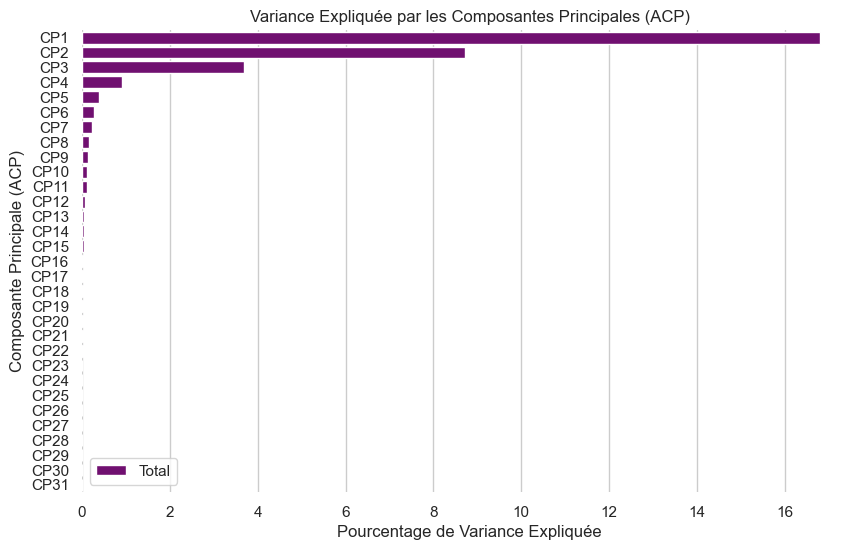

In [73]:
 #Définir le style du fond
sns.set(style="whitegrid")

# Initialiser le graphique matplotlib
plt.figure(figsize=(10, 6))

# Utiliser un barplot horizontal
bar_plot = sns.barplot(x='explained_variance', y="ACP", data=df_acp,
                       label="Total", color="purple")

# Ajouter une touche esthétique
sns.despine(left=True, bottom=True)

# Ajouter des titres et des étiquettes
plt.title('Variance Expliquée par les Composantes Principales (ACP)')
plt.xlabel('Pourcentage de Variance Expliquée')
plt.ylabel('Composante Principale (ACP)')

# Afficher le graphique
plt.show()

<h3>REPRESENTATION DES INDIVIDUS</h3>

</h4>Représentation des individus dans le premier plan</h4>

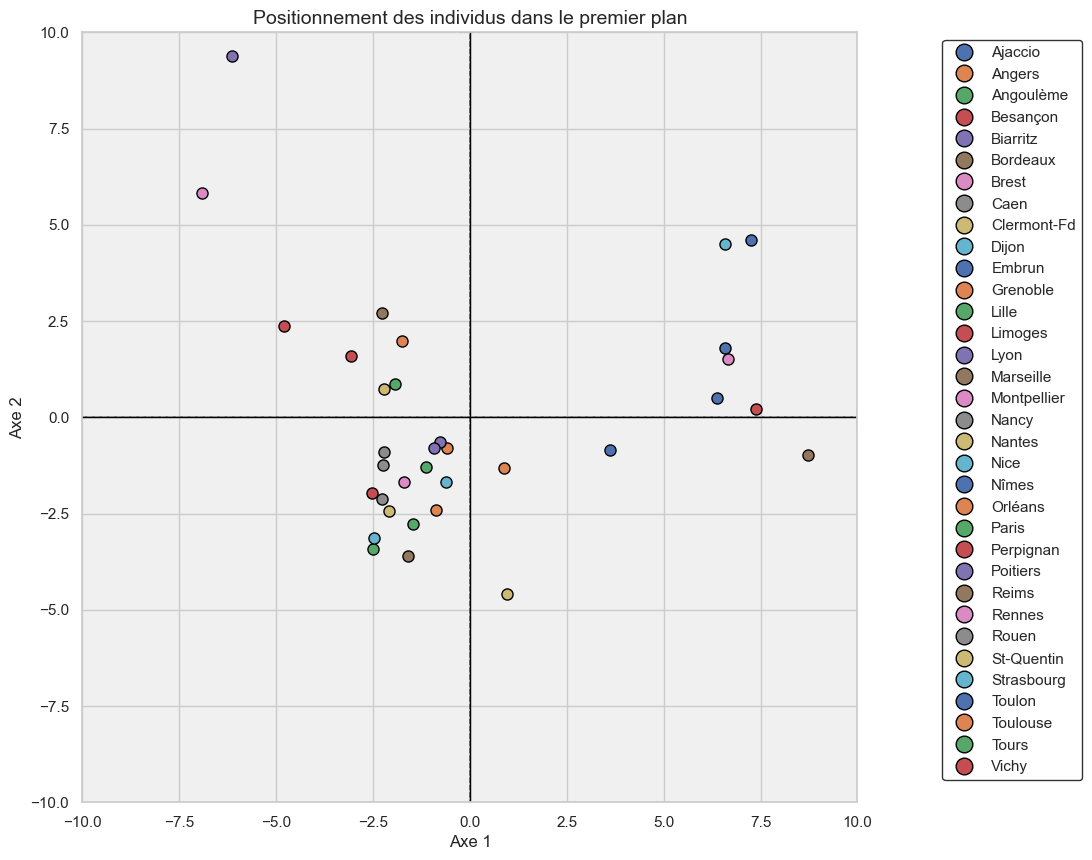

In [84]:


# Positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-10, 10)
axes.set_ylim(-10, 10)

# Ajouter un fond coloré pour le graphique
axes.set_facecolor('#f0f0f0')

# Ajouter des cercles pour mettre en évidence les individus
for i, (x, y) in enumerate(zip(coord[:, 0], coord[:, 1])):
    axes.plot(x, y, 'o', markersize=8, label=df.index[i], markeredgecolor='black', markeredgewidth=1)

# Ajouter des axes avec des flèches
axes.arrow(0, -10, 0, 20, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')
axes.arrow(-10, 0, 20, 0, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')

# Ajouter des lignes d'axe
axes.axhline(0, color='black', linestyle='-', linewidth=1)
axes.axvline(0, color='black', linestyle='-', linewidth=1)

# Ajouter une légende pour les individus
axes.legend(loc='upper right', bbox_to_anchor=(1.3, 1), markerscale=1.5, frameon=True, edgecolor='black')

# Titres et labels
axes.set_title("Positionnement des individus dans le premier plan", fontsize=14)
axes.set_xlabel("Axe 1", fontsize=12)
axes.set_ylabel("Axe 2", fontsize=12)

# Affichage du graphique
plt.grid(True)
plt.show()


<h4>Représentation des individus dans le deuxième plan</h4>

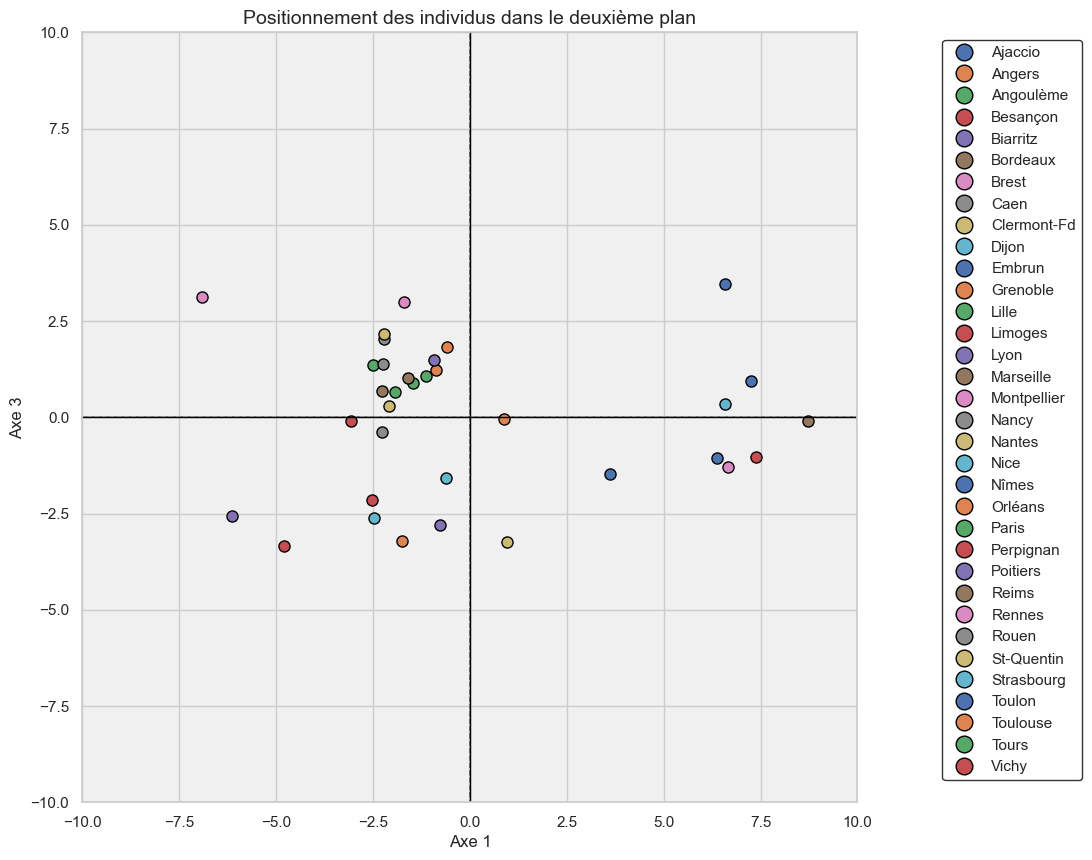

In [86]:


# Positionnement des individus dans le deuxième plan
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-10, 10)
axes.set_ylim(-10, 10)

# Ajouter un fond coloré pour le graphique
axes.set_facecolor('#f0f0f0')

# Ajouter des cercles pour mettre en évidence les individus
for i, (x, y) in enumerate(zip(coord[:, 0], coord[:, 2])):
    axes.plot(x, y, 'o', markersize=8, label=df.index[i], markeredgecolor='black', markeredgewidth=1)

# Ajouter des axes avec des flèches
axes.arrow(0, -10, 0, 20, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')
axes.arrow(-10, 0, 20, 0, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')

# Ajouter des lignes d'axe
axes.axhline(0, color='black', linestyle='-', linewidth=1)
axes.axvline(0, color='black', linestyle='-', linewidth=1)

# Ajouter une légende pour les individus
axes.legend(loc='upper right', bbox_to_anchor=(1.3, 1), markerscale=1.5, frameon=True, edgecolor='black')

# Titres et labels
axes.set_title("Positionnement des individus dans le deuxième plan", fontsize=14)
axes.set_xlabel("Axe 1", fontsize=12)
axes.set_ylabel("Axe 3", fontsize=12)  # Modifier le label de l'axe Y en conséquence

# Affichage du graphique
plt.grid(True)
plt.show()


<h4>Représentation des individus dans le troisième plan</h4>

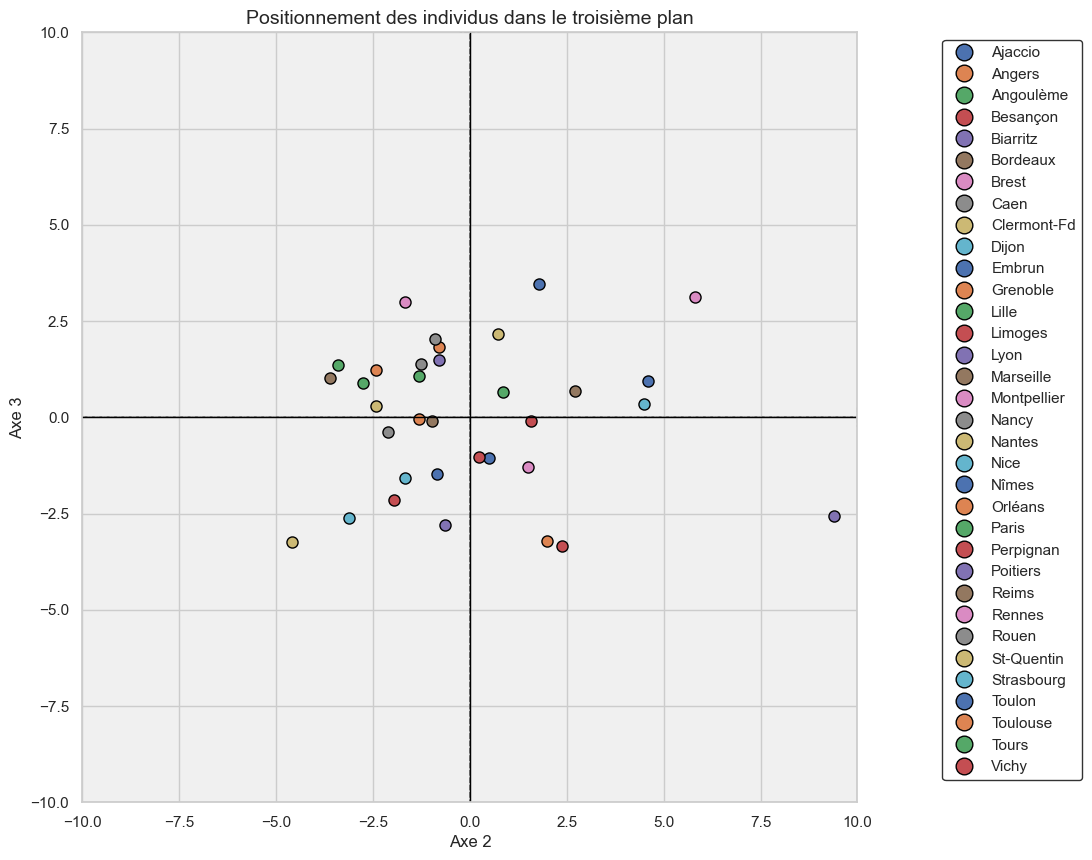

In [87]:


# Positionnement des individus dans le troisième plan
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-10, 10)
axes.set_ylim(-10, 10)

# Ajouter un fond coloré pour le graphique
axes.set_facecolor('#f0f0f0')

# Ajouter des cercles pour mettre en évidence les individus
for i, (x, y) in enumerate(zip(coord[:, 1], coord[:, 2])):
    axes.plot(x, y, 'o', markersize=8, label=df.index[i], markeredgecolor='black', markeredgewidth=1)

# Ajouter des axes avec des flèches
axes.arrow(0, -10, 0, 20, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')
axes.arrow(-10, 0, 20, 0, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')

# Ajouter des lignes d'axe
axes.axhline(0, color='black', linestyle='-', linewidth=1)
axes.axvline(0, color='black', linestyle='-', linewidth=1)

# Ajouter une légende pour les individus
axes.legend(loc='upper right', bbox_to_anchor=(1.3, 1), markerscale=1.5, frameon=True, edgecolor='black')

# Titres et labels
axes.set_title("Positionnement des individus dans le troisième plan", fontsize=14)
axes.set_xlabel("Axe 2", fontsize=12)  # Modifier le label de l'axe X en conséquence
axes.set_ylabel("Axe 3", fontsize=12)  # Modifier le label de l'axe Y en conséquence

# Affichage du graphique
plt.grid(True)
plt.show()


<h4>CONTRIBUTION DES INDIVIDUS DANS L'INERTIE TOTALE</h4>

In [64]:
#contribution des individus dans l'inertie totale 
di = np.sum(Z**2,axis=1) 
df_ctr_ind= pd.DataFrame({'ID':df.index,'d_i':di})
df_ctr_ind.head() 

,ID,d_i
0,Ajaccio,64.098578
1,Angers,5.596387
2,Angoulème,6.787763
3,Besançon,42.218978
4,Biarritz,136.372614


In [75]:
#Individus qui contribuent le plus à l'inertie totale
df_ctr_ind[df_ctr_ind['d_i'] > df_ctr_ind.d_i.mean()]

,ID,d_i
0,Ajaccio,64.098578
3,Besançon,42.218978
4,Biarritz,136.372614
6,Brest,93.665813
8,Clermont-Fd,39.094149
15,Marseille,78.917666
16,Montpellier,53.018155
19,Nice,67.760771
20,Nîmes,44.257999
23,Perpignan,60.921171


<h4>CONTRIBUTION DES INDIVIDUS AUX AXES DU PREMIER PLAN</h4>

In [66]:
#Contributions des individus aux axes du premier plan
eigval = (31-1)/31*acp.explained_variance_

ctr = coord**2
for j in range(31):
    ctr[:,j] = ctr[:,j]/(31*eigval[j])

df_ctr_cp1cp2 = pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
df_ctr_cp1cp2.head()

,id,CTR_1,CTR_2
0,Ajaccio,0.086199,0.012307
1,Angers,0.000721,0.002421
2,Angoulème,0.007484,0.002813
3,Besançon,0.045453,0.021545
4,Biarritz,0.075048,0.337077


In [71]:
#Garder les individus interprétables du premier axe du premier plan
df_ctr_cp1cp2[df_ctr_cp1cp2['CTR_1'] > df_ctr_cp1cp2.CTR_1.mean()]

,id,CTR_1,CTR_2
0,Ajaccio,0.086199,0.012307
3,Besançon,0.045453,0.021545
4,Biarritz,0.075048,0.337077
6,Brest,0.095055,0.129165
15,Marseille,0.151066,0.003713
16,Montpellier,0.087831,0.008626
19,Nice,0.085824,0.077267
20,Nîmes,0.080652,0.000960
23,Perpignan,0.108414,0.000194
30,Toulon,0.104365,0.081119


In [88]:
#Garder les individus interprétables du deuxième axe du premier plan
df_ctr_cp1cp2[df_ctr_cp1cp2['CTR_2'] > df_ctr_cp1cp2.CTR_2.mean()]

,id,CTR_1,CTR_2
4,Biarritz,0.075048,0.337077
6,Brest,0.095055,0.129165
8,Clermont-Fd,0.001845,0.080210
12,Lille,0.012297,0.044418
19,Nice,0.085824,0.077267
25,Reims,0.005053,0.049481
29,Strasbourg,0.012021,0.037484
30,Toulon,0.104365,0.081119


<h4>CONTRIBUTION DES INDIVIDUS AUX AXES DU DEUXIEME PLAN</h4>

In [89]:
#Contributions des individus aux axes du deuxième plan
eigval = (31-1)/31*acp.explained_variance_

ctr = coord**2
for j in range(31):
    ctr[:,j] = ctr[:,j]/(31*eigval[j])

df_ctr_cp1cp3 = pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_3':ctr[:,2]})
df_ctr_cp1cp3

,id,CTR_1,CTR_3
0,Ajaccio,0.086199,0.108568
1,Angers,0.000721,0.030094
2,Angoulème,0.007484,0.003819
3,Besançon,0.045453,0.101319
4,Biarritz,0.075048,0.059205
5,Bordeaux,0.010096,0.004065
6,Brest,0.095055,0.088417
7,Caen,0.009655,0.036945
8,Clermont-Fd,0.001845,0.094426
9,Dijon,0.000751,0.022184


In [90]:
#Garder les individus interprétables du premier axe du deuxième plan
df_ctr_cp1cp3[df_ctr_cp1cp2['CTR_1'] > df_ctr_cp1cp2.CTR_1.mean()]

,id,CTR_1,CTR_3
0,Ajaccio,0.086199,0.108568
3,Besançon,0.045453,0.101319
4,Biarritz,0.075048,0.059205
6,Brest,0.095055,0.088417
15,Marseille,0.151066,0.000067
16,Montpellier,0.087831,0.014772
19,Nice,0.085824,0.001127
20,Nîmes,0.080652,0.009941
23,Perpignan,0.108414,0.009729
30,Toulon,0.104365,0.008209


In [91]:
#Garder les individus interprétables du deuxième axe du deuxième plan
df_ctr_cp1cp3[df_ctr_cp1cp3['CTR_3'] > df_ctr_cp1cp3.CTR_3.mean()]

,id,CTR_1,CTR_3
0,Ajaccio,0.086199,0.108568
3,Besançon,0.045453,0.101319
4,Biarritz,0.075048,0.059205
6,Brest,0.095055,0.088417
7,Caen,0.009655,0.036945
8,Clermont-Fd,0.001845,0.094426
11,Grenoble,0.006027,0.092968
14,Lyon,0.001208,0.071256
18,Nantes,0.009758,0.042122
26,Rennes,0.005671,0.081549


<h4>CONTRIBUTION DES INDIVIDUS AUX AXES DU TROISIEME PLAN</h4>

In [92]:
#Contributions des individus aux axes du troisième plan
eigval = (31-1)/31*acp.explained_variance_

ctr = coord**2
for j in range(31):
    ctr[:,j] = ctr[:,j]/(31*eigval[j])

df_ctr_cp2cp3 = pd.DataFrame({'id':df.index,'CTR_2':ctr[:,1],'CTR_3':ctr[:,2]})
df_ctr_cp2cp3

,id,CTR_2,CTR_3
0,Ajaccio,0.012307,0.108568
1,Angers,0.002421,0.030094
2,Angoulème,0.002813,0.003819
3,Besançon,0.021545,0.101319
4,Biarritz,0.337077,0.059205
5,Bordeaux,0.028214,0.004065
6,Brest,0.129165,0.088417
7,Caen,0.003024,0.036945
8,Clermont-Fd,0.080210,0.094426
9,Dijon,0.010771,0.022184


In [94]:
#Garder les individus interprétables du premier axe du troisième plan
df_ctr_cp2cp3[df_ctr_cp2cp3['CTR_2'] > df_ctr_cp2cp3.CTR_2.mean()]

,id,CTR_2,CTR_3
4,Biarritz,0.337077,0.059205
6,Brest,0.129165,0.088417
8,Clermont-Fd,0.080210,0.094426
12,Lille,0.044418,0.016592
19,Nice,0.077267,0.001127
25,Reims,0.049481,0.009150
29,Strasbourg,0.037484,0.061763
30,Toulon,0.081119,0.008209


In [95]:
#Garder les individus interpretable du deuxième axe du troisième plan
df_ctr_cp2cp3[df_ctr_cp2cp3['CTR_3'] > df_ctr_cp2cp3.CTR_3.mean()]

,id,CTR_2,CTR_3
0,Ajaccio,0.012307,0.108568
3,Besançon,0.021545,0.101319
4,Biarritz,0.337077,0.059205
6,Brest,0.129165,0.088417
7,Caen,0.003024,0.036945
8,Clermont-Fd,0.080210,0.094426
11,Grenoble,0.015158,0.092968
14,Lyon,0.001546,0.071256
18,Nantes,0.002078,0.042122
26,Rennes,0.010663,0.081549


<h4>QUALITE DE REPRESENTATION DES INDIVIDUS SUR LE PREMIER PLAN</h4>

In [96]:
#Qualité de représentation des individus - COS2 premier plan
cos2 = coord**2
for j in range(31):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_12 = pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
df_ctr_12

,id,COS2_1,COS2_2
0,Ajaccio,0.677966,0.050252
1,Angers,0.064957,0.113221
2,Angoulème,0.555839,0.108454
3,Besançon,0.542753,0.133563
4,Biarritz,0.277437,0.646921
5,Bordeaux,0.327502,0.475148
6,Brest,0.511615,0.360921
7,Caen,0.394016,0.064069
8,Clermont-Fd,0.023792,0.536987
9,Dijon,0.048637,0.362192


In [97]:
#Filtrer les individus ayant une bonne représentation sur l'axe 1 
df_ctr_12[df_ctr_12['COS2_1'] > df_ctr_12.COS2_1.mean()]

,id,COS2_1,COS2_2
0,Ajaccio,0.677966,0.050252
2,Angoulème,0.555839,0.108454
3,Besançon,0.542753,0.133563
6,Brest,0.511615,0.360921
10,Embrun,0.540064,0.030317
13,Limoges,0.711596,0.189600
15,Marseille,0.965038,0.012314
16,Montpellier,0.835168,0.042582
17,Nancy,0.444126,0.392668
18,Nantes,0.400721,0.044297


In [98]:
#Filtrer les individus ayant une bonne représentation sur l'axe 1 
df_ctr_12[df_ctr_12['COS2_1'] > df_ctr_12.COS2_1.mean()]

,id,COS2_1,COS2_2
0,Ajaccio,0.677966,0.050252
2,Angoulème,0.555839,0.108454
3,Besançon,0.542753,0.133563
6,Brest,0.511615,0.360921
10,Embrun,0.540064,0.030317
13,Limoges,0.711596,0.189600
15,Marseille,0.965038,0.012314
16,Montpellier,0.835168,0.042582
17,Nancy,0.444126,0.392668
18,Nantes,0.400721,0.044297


In [116]:
# Filter individuals based on conditions
selected_individuals_1 = df_ctr_12[df_ctr_12['COS2_1'] > df_ctr_12.COS2_1.mean()].id
selected_individuals_2 = df_ctr_12[df_ctr_12['COS2_2'] > df_ctr_12.COS2_2.mean()].id

# Concatenate the selected individuals
result_series = pd.concat([selected_individuals_1, selected_individuals_2])



# If you want to reset the index
result_series = result_series.reset_index(drop=True)

result_series 



0         Ajaccio
1       Angoulème
2        Besançon
3           Brest
4          Embrun
5         Limoges
6       Marseille
7     Montpellier
8           Nancy
9          Nantes
10           Nice
11          Nîmes
12      Perpignan
13          Rouen
14         Toulon
15       Biarritz
16       Bordeaux
17          Brest
18    Clermont-Fd
19          Dijon
20          Lille
21          Nancy
22           Nice
23        Orléans
24          Paris
25          Reims
26     St-Quentin
27     Strasbourg
28         Toulon
29          Tours
Name: id, dtype: object

<h4>QUALITE DE REPRESENTATION DES INDIVIDUS SUR LE DEUXIEME PLAN</h4>

In [195]:
#Qualité de représentation des individus - COS2 deuxième plan
cos2 = coord**2
for j in range(31):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_13 = pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_3':cos2[:,2]})
df_ctr_13

,id,COS2_1,COS2_3
0,Ajaccio,0.677966,0.187666
1,Angers,0.064957,0.595812
2,Angoulème,0.555839,0.062330
3,Besançon,0.542753,0.265897
4,Biarritz,0.277437,0.048102
5,Bordeaux,0.327502,0.028982
6,Brest,0.511615,0.104589
7,Caen,0.394016,0.331348
8,Clermont-Fd,0.023792,0.267616
9,Dijon,0.048637,0.315791


In [196]:
#Filtrer les individus ayant une bonne représentation sur l'axe 1 
df_ctr_13[df_ctr_13['COS2_1'] > df_ctr_13.COS2_1.mean()]

,id,COS2_1,COS2_3
0,Ajaccio,0.677966,0.187666
2,Angoulème,0.555839,0.062330
3,Besançon,0.542753,0.265897
6,Brest,0.511615,0.104589
10,Embrun,0.540064,0.089488
13,Limoges,0.711596,0.000908
15,Marseille,0.965038,0.000094
16,Montpellier,0.835168,0.030872
17,Nancy,0.444126,0.013128
18,Nantes,0.400721,0.380154


In [197]:
#Filtrer les individus ayant une bonne représentation sur l'axe 3 
df_ctr_13[df_ctr_13['COS2_3'] > df_ctr_13.COS2_3.mean()]

,id,COS2_1,COS2_3
0,Ajaccio,0.677966,0.187666
1,Angers,0.064957,0.595812
3,Besançon,0.542753,0.265897
7,Caen,0.394016,0.331348
8,Clermont-Fd,0.023792,0.267616
9,Dijon,0.048637,0.315791
11,Grenoble,0.149791,0.507783
14,Lyon,0.054574,0.707287
18,Nantes,0.400721,0.380154
24,Poitiers,0.146369,0.382778


In [201]:
# Filter individuals based on conditions
selected_individuals_1 = df_ctr_13[df_ctr_13['COS2_1'] > df_ctr_13.COS2_1.mean()].id
selected_individuals_3 = df_ctr_13[df_ctr_13['COS2_3'] > df_ctr_13.COS2_3.mean()].id

# Concatenate the selected individuals
result_series = pd.concat([selected_individuals_1, selected_individuals_3])

# If you want to reset the index
result_series = result_series.reset_index(drop=True)

result_series

0         Ajaccio
1       Angoulème
2        Besançon
3           Brest
4          Embrun
5         Limoges
6       Marseille
7     Montpellier
8           Nancy
9          Nantes
10           Nice
11          Nîmes
12      Perpignan
13          Rouen
14         Toulon
15        Ajaccio
16         Angers
17       Besançon
18           Caen
19    Clermont-Fd
20          Dijon
21       Grenoble
22           Lyon
23         Nantes
24       Poitiers
25         Rennes
26     Strasbourg
27          Tours
28          Vichy
Name: id, dtype: object

<h4>QUALITE DE REPRESENTATION DES INDIVIDUS SUR LE TROISIEME PLAN</h4>

In [117]:
#Qualité de représentation des individus - COS2 troisième plan
cos2 = coord**2
for j in range(31):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_23 = pd.DataFrame({'id':df.index,'COS2_2':cos2[:,1],'COS2_3':cos2[:,2]})
df_ctr_23

,id,COS2_2,COS2_3
0,Ajaccio,0.050252,0.187666
1,Angers,0.113221,0.595812
2,Angoulème,0.108454,0.062330
3,Besançon,0.133563,0.265897
4,Biarritz,0.646921,0.048102
5,Bordeaux,0.475148,0.028982
6,Brest,0.360921,0.104589
7,Caen,0.064069,0.331348
8,Clermont-Fd,0.536987,0.267616
9,Dijon,0.362192,0.315791


In [118]:
#Filtrer les individus ayant une bonne représentation sur l'axe 2 
df_ctr_23[df_ctr_23['COS2_2'] > df_ctr_23.COS2_2.mean()]

,id,COS2_2,COS2_3
4,Biarritz,0.646921,0.048102
5,Bordeaux,0.475148,0.028982
6,Brest,0.360921,0.104589
8,Clermont-Fd,0.536987,0.267616
9,Dijon,0.362192,0.315791
12,Lille,0.532976,0.084279
17,Nancy,0.392668,0.013128
19,Nice,0.298443,0.001843
21,Orléans,0.685276,0.180377
22,Paris,0.669356,0.070798


In [119]:
#Filtrer les individus ayant une bonne représentation sur l'axe 3 
df_ctr_23[df_ctr_23['COS2_3'] > df_ctr_23.COS2_3.mean()]

,id,COS2_2,COS2_3
0,Ajaccio,0.050252,0.187666
1,Angers,0.113221,0.595812
3,Besançon,0.133563,0.265897
7,Caen,0.064069,0.331348
8,Clermont-Fd,0.536987,0.267616
9,Dijon,0.362192,0.315791
11,Grenoble,0.195574,0.507783
14,Lyon,0.036257,0.707287
18,Nantes,0.044297,0.380154
24,Poitiers,0.111115,0.382778


In [120]:
# Filter individuals based on conditions
selected_individuals_2 = df_ctr_23[df_ctr_23['COS2_2'] > df_ctr_23.COS2_2.mean()].id
selected_individuals_3 = df_ctr_23[df_ctr_23['COS2_3'] > df_ctr_23.COS2_3.mean()].id

# Concatenate the selected individuals
result_series = pd.concat([selected_individuals_2, selected_individuals_3])

# If you want to reset the index
result_series = result_series.reset_index(drop=True)

result_series

0        Biarritz
1        Bordeaux
2           Brest
3     Clermont-Fd
4           Dijon
5           Lille
6           Nancy
7            Nice
8         Orléans
9           Paris
10          Reims
11     St-Quentin
12     Strasbourg
13         Toulon
14          Tours
15        Ajaccio
16         Angers
17       Besançon
18           Caen
19    Clermont-Fd
20          Dijon
21       Grenoble
22           Lyon
23         Nantes
24       Poitiers
25         Rennes
26     Strasbourg
27          Tours
28          Vichy
Name: id, dtype: object

<h3>REPRESENTATION DES VARIABLES</h3>

In [121]:
# Vecteurs propres
pd.DataFrame(acp.components_)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.121653,-4.697622e-02,-2.583594e-02,-9.688033e-02,-1.567778e-01,-1.737396e-01,-2.111658e-01,-1.922993e-01,-7.829064e-02,4.942115e-02,...,-2.375733e-01,-2.265391e-01,-2.295910e-01,-2.187552e-01,-2.429952e-01,1.778051e-01,7.652264e-02,2.237680e-01,-1.408617e-01,6.159344e-02
1,0.277725,3.236130e-01,3.229935e-01,2.776204e-01,1.034613e-01,2.005814e-05,-3.655441e-02,5.328617e-02,2.703358e-01,3.078749e-01,...,-3.012233e-02,3.126892e-02,-1.586917e-02,3.426518e-03,-3.445823e-02,1.845266e-01,-1.544238e-01,1.286681e-01,-2.265707e-01,-1.023437e-01
2,0.079857,3.619924e-02,-6.054651e-02,-1.694439e-01,-3.149645e-01,-3.548649e-01,-2.255952e-01,-2.938386e-01,-2.283982e-01,-3.502145e-02,...,8.577921e-02,1.696100e-01,1.624171e-01,2.258955e-01,8.213947e-02,4.192183e-02,-3.734903e-01,-2.730083e-02,-2.437740e-01,-3.372936e-01
3,0.187096,1.731703e-01,4.905759e-02,1.060349e-01,-1.195093e-03,1.769708e-01,1.190653e-01,8.247195e-03,-2.247429e-01,-3.339474e-01,...,-1.267231e-01,-1.565303e-01,-3.750768e-02,-7.821890e-02,-4.450747e-02,-2.075908e-01,3.380302e-01,1.112000e-01,1.062667e-02,-6.907531e-01
4,-0.056102,-1.068521e-01,-7.235377e-02,1.867377e-01,5.497614e-01,5.389093e-02,-3.994819e-02,-2.603627e-01,-1.826936e-01,-1.860571e-01,...,-1.150878e-01,-1.177851e-01,-7.717112e-02,4.455983e-02,-8.999485e-03,4.607695e-01,-2.571201e-01,4.736103e-03,1.444730e-01,-5.087205e-02
5,-0.292627,-2.213047e-02,2.834260e-02,3.605457e-01,-2.948556e-01,-1.584480e-01,2.243341e-01,-1.219189e-01,-6.763148e-02,6.856215e-02,...,1.051785e-01,-1.932990e-01,-2.510086e-01,-2.819255e-01,-4.713383e-03,-1.115360e-02,-2.481048e-01,-1.362212e-01,2.845645e-02,-1.466197e-01
6,0.031753,-4.600624e-02,-2.182532e-01,6.213212e-02,5.748841e-02,8.738645e-02,-1.705193e-01,1.030010e-01,-3.438032e-02,-1.308990e-01,...,-1.242304e-01,9.521449e-02,1.150828e-01,-9.337981e-02,-3.970363e-02,-3.417173e-01,-3.736269e-01,1.174805e-02,1.909895e-01,8.674490e-02
7,-0.096529,-3.454152e-02,-4.611322e-01,-5.074968e-02,-2.090462e-01,6.089864e-02,1.203219e-01,9.761180e-02,2.431132e-01,-9.528182e-02,...,1.598890e-01,-4.922403e-02,6.987495e-02,-2.380009e-02,2.346552e-02,4.475252e-01,3.031137e-01,-2.944717e-02,-4.288092e-02,-3.574225e-02
8,-0.076420,-4.049418e-01,2.993788e-01,-1.928363e-02,-4.695822e-02,3.054254e-02,-3.281112e-01,3.356407e-01,-1.010615e-01,1.821767e-01,...,-2.033761e-02,-1.559859e-01,2.248040e-01,-2.750136e-02,1.258879e-02,-4.319431e-02,1.504940e-02,1.116490e-01,3.603541e-02,-1.197786e-01
9,-0.279453,-6.970786e-02,3.902426e-01,4.004983e-01,-9.730645e-03,3.030658e-02,-8.224481e-02,6.537460e-02,3.324054e-02,-2.794792e-01,...,8.266332e-03,8.865645e-02,1.212776e-02,4.075247e-02,1.292065e-02,1.291623e-01,-1.300130e-02,-8.820540e-02,7.283897e-02,2.108938e-02


In [219]:
#Matrice de corrélation

#Racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#Corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#Afficher la matrice des corrélations variables x facteurs
print(pd.DataFrame(corvar))

          0         1         2         3         4         5         6   \
0  -0.490589  0.806973  0.150972  0.176517 -0.034263 -0.147781  0.015154   
1  -0.189441  0.940307  0.068436  0.163379 -0.065258 -0.011176 -0.021957   
2  -0.104188  0.938506 -0.114465  0.046284 -0.044189  0.014313 -0.104163   
3  -0.390688  0.806668 -0.320340  0.100039  0.114047  0.182082  0.029653   
4  -0.632236  0.300623 -0.595452 -0.001128  0.335758 -0.148907  0.027437   
5  -0.700638  0.000058 -0.670885  0.166964  0.032913 -0.080019  0.041706   
6  -0.851566 -0.106214 -0.426496  0.112333 -0.024398  0.113293 -0.081381   
7  -0.775484  0.154831 -0.555513  0.007781 -0.159012 -0.061571  0.049158   
8  -0.315722  0.785501 -0.431795 -0.212035 -0.111577 -0.034155 -0.016408   
9   0.199300  0.894577 -0.066209 -0.315065 -0.113631  0.034625 -0.062472   
10 -0.006530  0.938728  0.104187  0.026817 -0.061170  0.114587  0.205098   
11 -0.261356  0.934001  0.127702  0.002281  0.031763 -0.056276 -0.018165   
12 -0.462586

In [220]:
#Matrice des corrélations des variables avec les trois premiers axes 
#On affiche pour les deux premiers axes
print(pd.DataFrame({'id':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2]} ))

                                     id     COR_1     COR_2     COR_3
0                              JANVIERp -0.490589  0.806973  0.150972
1                              FEVRIERp -0.189441  0.940307  0.068436
2                                 MARSp -0.104188  0.938506 -0.114465
3                                AVRILp -0.390688  0.806668 -0.320340
4                                  MAIp -0.632236  0.300623 -0.595452
5                                 JUINp -0.700638  0.000058 -0.670885
6                              JUILLETp -0.851566 -0.106214 -0.426496
7                                 AOUTp -0.775484  0.154831 -0.555513
8                            SEPTEMBREp -0.315722  0.785501 -0.431795
9                              OCTOBREp  0.199300  0.894577 -0.066209
10                            NOVEMBREp -0.006530  0.938728  0.104187
11                            DECEMBREp -0.261356  0.934001  0.127702
12             Précipitations annuelles -0.462586  0.846689 -0.252813
13                  

<h4>REPRESENTATION DES VARIABLES DANS LE PREMIER PLAN</h4>

In [223]:
## Contribution des variables aux axes du premier plan
cos2var=corvar**2
ctrvar = cos2var
val_p = (n-1)/n*acp.explained_variance_

for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/val_p[k]
    
#On affiche pour les deux premiers axes
pd.DataFrame({'id':df.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}) 

,id,CTR_1,CTR_2
0,JANVIERp,0.014709,7.666064e-02
1,FEVRIERp,0.002193,1.040863e-01
2,MARSp,0.000663,1.036881e-01
3,AVRILp,0.009329,7.660270e-02
4,MAIp,0.024429,1.063892e-02
5,JUINp,0.030001,3.998737e-10
6,JUILLETp,0.044319,1.328070e-03
7,AOUTp,0.036753,2.822087e-03
8,SEPTEMBREp,0.006092,7.263542e-02
9,OCTOBREp,0.002428,9.420846e-02


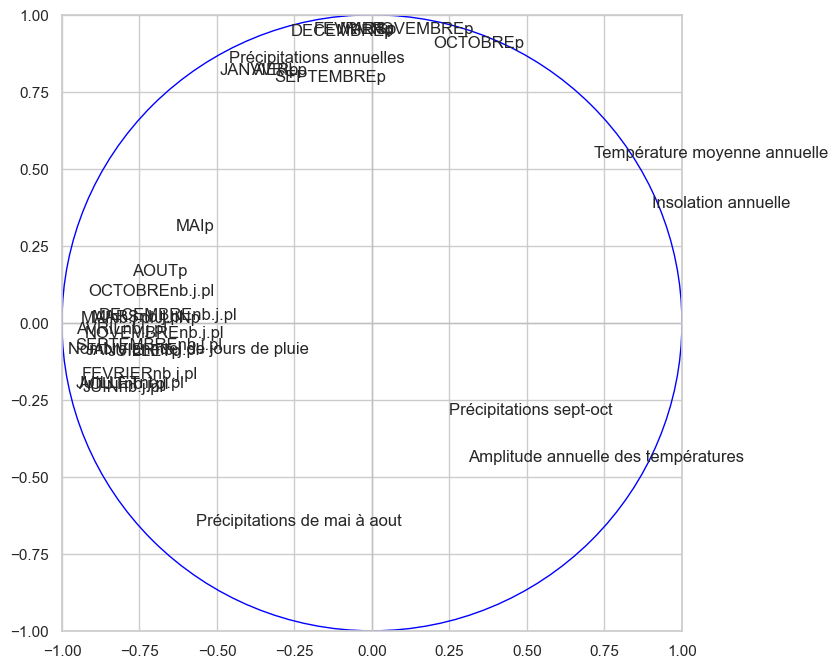

In [224]:
#Cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#Affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(df.columns[j],(corvar[j,0],corvar[j,1]))

#Ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#Ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

In [225]:
#Qualité de représentation des variables sur les axes
#cosinus carré des variables
cos2var = corvar**2
df_ctr_variables = pd.DataFrame({'id':df.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]})
#Filtrer les variables avec un taux de représentation supérier à la moyenne sur l'axe 1
df_ctr_variables[df_ctr_variables['COS2_1'] > df_ctr_variables['COS2_1'].mean()]

,id,COS2_1,COS2_2
6,JUILLETp,0.725165,0.011281
7,AOUTp,0.601375,0.023973
13,JANVIERnb.j.pl,0.853532,0.010567
14,FEVRIERnb.j.pl,0.876582,0.032031
15,MARSnb.j.pl,0.815922,0.000031
16,AVRILnb.j.pl,0.913862,0.001163
17,MAInb.j.pl,0.881900,0.000002
18,JUINnb.j.pl,0.872203,0.050071
19,JUILLETnb.j.pl,0.914211,0.044233
20,AOUTnb.j.pl,0.899197,0.045873


In [226]:
# Filtrer les variables avec un taux de représentation supérier à la moyenne sur l'axe 2
df_ctr_variables[df_ctr_variables['COS2_2'] > df_ctr_variables['COS2_2'].mean()]

,id,COS2_1,COS2_2
0,JANVIERp,0.240678,0.651205
1,FEVRIERp,0.035888,0.884176
2,MARSp,0.010855,0.880794
3,AVRILp,0.152637,0.650713
8,SEPTEMBREp,0.099680,0.617012
9,OCTOBREp,0.039721,0.800268
10,NOVEMBREp,0.000043,0.881211
11,DECEMBREp,0.068307,0.872358
12,Précipitations annuelles,0.213986,0.716882
26,Température moyenne annuelle,0.514136,0.287478


<h4>REPRESENTATION DES VARIABLES DANS LE DEUXIEME PLAN</h4>

In [227]:
## Contribution des variables aux axes du deuxième plan
ctr = coord**2  

for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*val_p[j])

pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_3':ctr[:,2]}) 

,id,CTR_1,CTR_3
0,Ajaccio,0.069891,0.088028
1,Angers,0.000585,0.024401
2,Angoulème,0.006068,0.003096
3,Besançon,0.036853,0.082150
4,Biarritz,0.060850,0.048004
5,Bordeaux,0.008186,0.003296
6,Brest,0.077071,0.071690
7,Caen,0.007829,0.029955
8,Clermont-Fd,0.001496,0.076562
9,Dijon,0.000609,0.017987


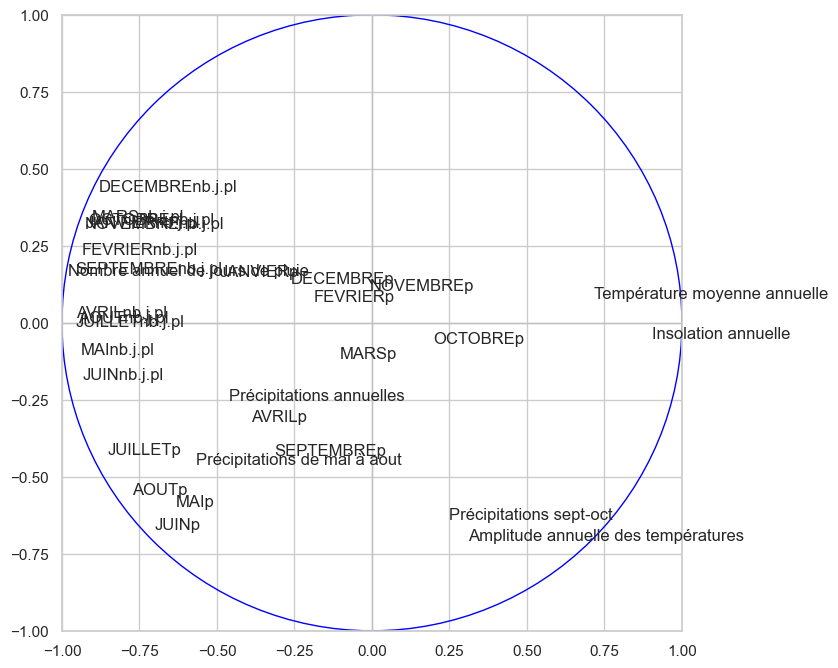

In [228]:
#Cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#Affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(df.columns[j],(corvar[j,0],corvar[j,2]))

#Ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#Ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

In [229]:
#Qualité de représentation des variables sur les axes
#cosinus carré des variables
cos2var = corvar**2
df_ctr_variables = pd.DataFrame({'id':df.columns,'COS2_1':cos2var[:,0],'COS2_3':cos2var[:,2]})
df_ctr_variables[df_ctr_variables['COS2_1'] > df_ctr_variables['COS2_1'].mean()]

,id,COS2_1,COS2_3
6,JUILLETp,0.725165,0.181899
7,AOUTp,0.601375,0.308594
13,JANVIERnb.j.pl,0.853532,0.095937
14,FEVRIERnb.j.pl,0.876582,0.049459
15,MARSnb.j.pl,0.815922,0.107595
16,AVRILnb.j.pl,0.913862,0.000295
17,MAInb.j.pl,0.881900,0.010647
18,JUINnb.j.pl,0.872203,0.033413
19,JUILLETnb.j.pl,0.914211,0.000105
20,AOUTnb.j.pl,0.899197,0.000001


In [230]:
df_ctr_variables[df_ctr_variables['COS2_3'] > df_ctr_variables['COS2_3'].mean()]

,id,COS2_1,COS2_3
4,MAIp,0.399723,0.354563
5,JUINp,0.490894,0.450087
6,JUILLETp,0.725165,0.181899
7,AOUTp,0.601375,0.308594
8,SEPTEMBREp,0.099680,0.186447
24,DECEMBREnb.j.pl,0.778227,0.182383
27,Amplitude annuelle des températures,0.095229,0.498573
29,Précipitations de mai à aout,0.322683,0.212395
30,Précipitations sept-oct,0.061696,0.406618


<h4>REPRESENTATION DES VARIABLES DANS LE TROISIEME PLAN</h4>

In [231]:
## Contribution des variables aux axes du 3eme plan
ctr = coord**2  

for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*val_p[j])

pd.DataFrame({'id':df.index,'CTR_2':ctr[:,1],'CTR_3':ctr[:,2]}) 

,id,CTR_2,CTR_3
0,Ajaccio,0.009979,0.088028
1,Angers,0.001963,0.024401
2,Angoulème,0.002281,0.003096
3,Besançon,0.017469,0.082150
4,Biarritz,0.273306,0.048004
5,Bordeaux,0.022876,0.003296
6,Brest,0.104728,0.071690
7,Caen,0.002452,0.029955
8,Clermont-Fd,0.065035,0.076562
9,Dijon,0.008733,0.017987


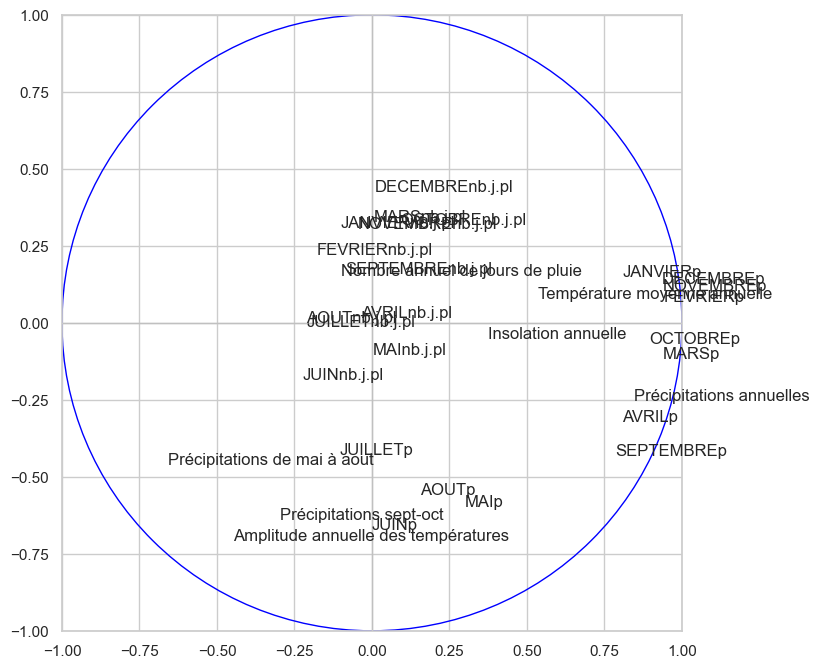

In [232]:
#Cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#Affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(df.columns[j],(corvar[j,1],corvar[j,2]))

#Ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#Ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

In [233]:
#Qualité de représentation des variables sur les axes
#cosinus carré des variables
cos2var = corvar**2
df_ctr_variables = pd.DataFrame({'id':df.columns,'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2]})
df_ctr_variables[df_ctr_variables['COS2_2'] > df_ctr_variables['COS2_2'].mean()]

,id,COS2_2,COS2_3
0,JANVIERp,0.651205,0.022792
1,FEVRIERp,0.884176,0.004683
2,MARSp,0.880794,0.013102
3,AVRILp,0.650713,0.102618
8,SEPTEMBREp,0.617012,0.186447
9,OCTOBREp,0.800268,0.004384
10,NOVEMBREp,0.881211,0.010855
11,DECEMBREp,0.872358,0.016308
12,Précipitations annuelles,0.716882,0.063914
26,Température moyenne annuelle,0.287478,0.006281


In [234]:
df_ctr_variables[df_ctr_variables['COS2_3'] > df_ctr_variables['COS2_3'].mean()]

,id,COS2_2,COS2_3
4,MAIp,9.037391e-02,0.354563
5,JUINp,3.396787e-09,0.450087
6,JUILLETp,1.128149e-02,0.181899
7,AOUTp,2.397264e-02,0.308594
8,SEPTEMBREp,6.170124e-01,0.186447
24,DECEMBREnb.j.pl,9.912722e-05,0.182383
27,Amplitude annuelle des températures,2.013332e-01,0.498573
29,Précipitations de mai à aout,4.334056e-01,0.212395
30,Précipitations sept-oct,8.843190e-02,0.406618
